In [3]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

In [4]:
with open('/home/nehleh/0_Research/PhD/Data/simulationdata/recombination/faketree/12.txt', 'r') as f:
    data = f.read().split(" ")
    ll = []
    for elem in data:
        try:
            ll.append(float(elem))
        except ValueError:
            pass

-1.748217237462315
-2.0609997599342784


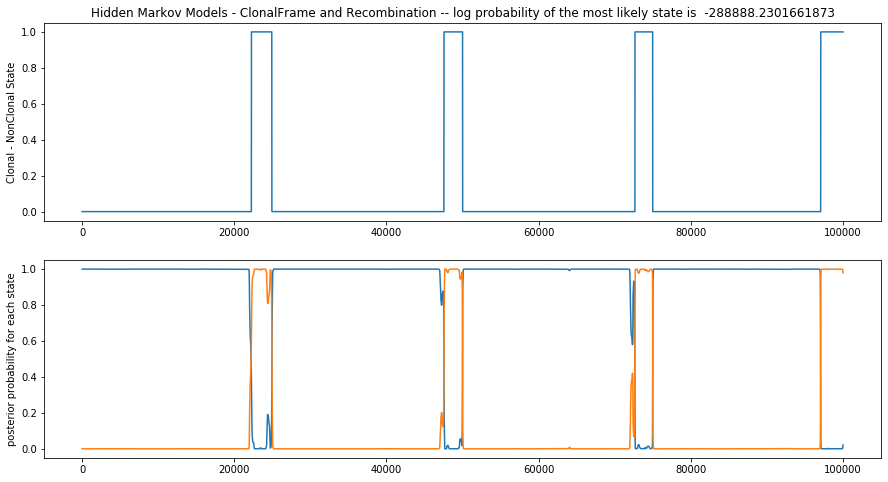

In [15]:
data = np.array(ll)
X = data.reshape((-1,1))


mean = np.mean(X)
std = np.std(X)

a = float(np.random.normal(mean,std,1))
b = float(np.random.normal(mean,std,1))
print(a)
print(b)

model = hmm.GaussianHMM(n_components=2, covariance_type="full" ,algorithm='viterbi' )
model.startprob_ = np.array([0.88, 0.12])
model.transmat_ = np.array([[0.9999, 0.0001] , [0.00025, 0.99975]])
model.means_ = np.array([[a, 0.0], [b, 0.0]])
model.covars_ = np.tile(np.identity(2), (2, 1, 1))


posterior = model.predict_proba(X)
hiddenStates = model.predict(X)
score = model.score(X)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(2,1,1)
ax.set_title("Hidden Markov Models - ClonalFrame and Recombination -- log probability of the most likely state is  " + str (score))
ax.plot(hiddenStates)
ax.set_ylabel("Clonal - NonClonal State")



ax2 = fig.add_subplot(2,1,2)
ax2.plot(posterior)
ax2.set_ylabel("posterior probability for each state")
plt.show()